Exam No: 0
Class Topper:  54512.71235274596
Exam No: 1
Class Topper:  27990.97219530044
Exam No: 2
Class Topper:  23841.346463819045
Exam No: 3
Class Topper:  19261.237916765014
Exam No: 4
Class Topper:  16037.71628124918
Exam No: 5
Class Topper:  15297.368182371441
Exam No: 6
Class Topper:  10416.42708598232
Exam No: 7
Class Topper:  8403.326831328013
Exam No: 8
Class Topper:  8403.326831328013
Exam No: 9
Class Topper:  7519.904304799745
Exam No: 10
Class Topper:  6153.663194924324
Exam No: 11
Class Topper:  4668.025923933056
Exam No: 12
Class Topper:  4104.6077590735995
Exam No: 13
Class Topper:  3391.8696218170476
Exam No: 14
Class Topper:  2903.8250148298707
Exam No: 15
Class Topper:  2512.1495337881415
Exam No: 16
Class Topper:  1806.5291637145665
Exam No: 17
Class Topper:  1132.4194860987545
Exam No: 18
Class Topper:  982.3986651800632
Exam No: 19
Class Topper:  851.15198679416
Exam No: 20
Class Topper:  766.6305577877047
Exam No: 21
Class Topper:  665.725879842894
Exam No: 22
Cl

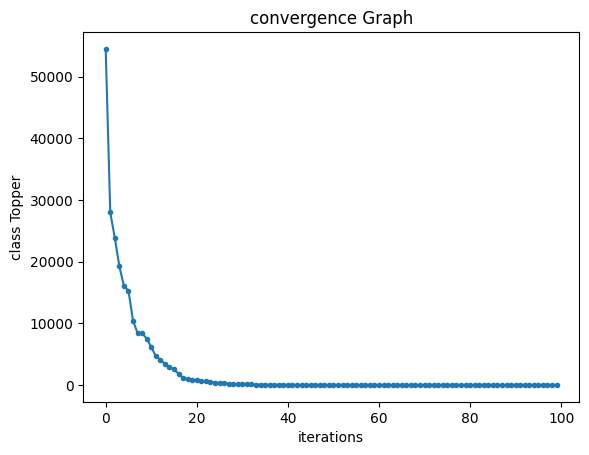

'\n# Final output (optional)\nprint("Section Topper Indices: \n", section_topper_index)\nprint("Section Topper Marks: \n", section_topper_marks)\nprint("Class Topper Indices: \n", class_topper_index)\nprint("Class Topper Marks: \n", class_topper_marks)\n\n# Calculate objective for all exams\nprint("Objective Function Value (Sum of squared marks):", objectivefunction(student_marks))'

In [2]:
import matplotlib.pyplot as plt

import numpy as np

def objectivefunction(student_marks):
    s =np.sum(np.square(student_marks))
    #print(s)
    return s  # Sum of squared marks as the objective


# Constants
section = 15
student = 100
courses = 30
min_marks = -100
max_marks = 100
n1 = 1.6
n2 = 1.4
exam = 100 # Correct number of exams
iwfmax = 0.5
iwfmin = 0
graph=[]
# Initialize random coefficients for adjustments
c1 = np.random.random()
c2 = np.random.random()

# Initialize arrays to store student marks and improvements
student_marks = np.zeros([exam, section, student, courses])  # Student marks in a class
i = np.zeros([exam, section, student, courses])  # Improved marks of students
pi = np.zeros([exam, section, student])  # Performance index (may be used later for further improvements)
section_topper_index = np.zeros((exam, section), dtype=int)  # Section topper index
section_topper_marks = np.zeros([exam, section])  # Section topper marks
class_topper_index = np.zeros((exam, 2), dtype=int)  # Class topper index
class_topper_marks = np.zeros(exam)  # Class topper marks

# Simulate exams
for ex in range(exam):  # Loop over exams
   # iwf = iwfmax - (((iwfmax - iwfmin) / exam) * ex)  # Weight factor decreases over exams
    iwf= iwfmax -((iwfmax-iwfmin)/max_marks *ex)
    print("Exam No:",ex)
    for sc in range(section):  # Loop over sections
        for st in range(student):  # Loop over students
            for c in range(courses):  # Loop over courses
                if ex == 0:
                    # For the first exam, initialize random marks
                    student_marks[ex, sc, st, c] = np.random.uniform(min_marks, max_marks)

                else:
                    if st == section_topper_index[ex - 1, sc]:
                        # If the student is the topper in the section
                        i[ex, sc, st, c] = (iwf * i[ex - 1, sc, st, c]) + (n1 * np.random.uniform(0,1)) * (student_marks[ex - 1, class_topper_index[ex - 1, 0], class_topper_index[ex - 1, 1], c]- student_marks[ex-1, sc, st, c])
                        student_marks[ex, sc, st, c] = student_marks[ex - 1, sc, st, c] + i[ex, sc, st, c]
                    else:
                        # If the student is not the topper, improve based on section topper
                        i[ex, sc, st, c] = (iwf * i[ex - 1, sc, st, c]) + (n2 * np.random.uniform(0,1)) * (student_marks[ex - 1, sc, section_topper_index[ex - 1, sc], c]- student_marks[ex-1, sc, st, c])
                        student_marks[ex, sc, st, c] = student_marks[ex - 1, sc, st, c] + i[ex, sc, st, c]
                    # Update student marks with improvement
           # student_marks[ex,sc,st] = np.clip(min_marks,max_marks,student_marks[ex,sc,st])
            pi[ex,sc,st] = objectivefunction(student_marks[ex,sc,st])
            if ex>0 and pi[ex,sc,st]>pi[ex-1,sc,st]:
              pi[ex,sc,st] = pi[ex-1,sc,st]
              student_marks[ex,sc,st] = student_marks[ex-1,sc,st]
        # Update section topper index for each section based on the current exam results
        section_topper_index[ex, sc] =  np.argmin(pi[ex,sc]) # Topper based on total marks across all courses
        #print("section topper index:" ,section_topper_index[ex,sc])
        section_topper_marks[ex, sc] = np.min(pi[ex,sc])  # Store section topper marks

    # Update class topper index based on overall performance
    #print("section topper marks:",section_topper_marks[ex,sc])
    class_topper_index[ex, 0] = np.argmin(section_topper_marks[ex])  # Best section
    class_topper_index[ex, 1] = section_topper_index[ex,np.argmin(section_topper_marks [ex])]  # Best student in the best section
    class_topper_marks[ex] = np.min(section_topper_marks[ex])  # Class topper marks
    graph.append(class_topper_marks[ex])
    print("Class Topper: ",class_topper_marks[ex])


plt.plot(graph,marker='.')
plt.xlabel('iterations')
plt.ylabel('class Topper')
plt.title('convergence Graph')
plt.grid(False)
plt.show()
"""
# Final output (optional)
print("Section Topper Indices: \n", section_topper_index)
print("Section Topper Marks: \n", section_topper_marks)
print("Class Topper Indices: \n", class_topper_index)
print("Class Topper Marks: \n", class_topper_marks)

# Calculate objective for all exams
print("Objective Function Value (Sum of squared marks):", objectivefunction(student_marks))"""
